In [1]:
import os
current_path = os.getcwd()
print(current_path)

C:\Users\us16120\Projects\PolymerAdditives


In [2]:
os.listdir("UVASpectrum")

['!Tin109.pdf',
 '!Tin213Tin1130.pdf',
 '!Tin326.pdf',
 '!Tin327.pdf',
 '!Tin328.pdf',
 '!Tin360.pdf',
 '!Tin571.pdf',
 '!Tin900.pdf',
 '!TinP.pdf',
 '!UV24.pdf',
 '!UV5411.pdf',
 '!UV9.pdf',
 'Chi326a.xls',
 'Chi326b.xls',
 'Chi326c.xls',
 'Chi328a.xls',
 'Chi328b.xls',
 'Chi328c.xls',
 'p1164a.xls',
 'p1164a3.xls',
 'p1164a4.xls',
 'p1164am.xls',
 'p1164b.xls',
 'p1164b2.xls',
 'p1164b3.xls',
 'p1164b4.xls',
 'p1164c.xls',
 'p1164c2.xls',
 'p1164c3.xls',
 'p2098a.xls',
 'p2098at.xls',
 'p2098b.xls',
 'p2098b2.xls',
 'p2098bt.xls',
 'p2098c.xls',
 'p2301am.xls',
 'p2301at.xls',
 'p2301bm.xls',
 'p2301bt.xls',
 'p2301cm.xls',
 'p2301ct.xls',
 'p2314at.xls',
 'p2314bm.xls',
 'p2314bt.xls',
 'p2314cm.xls',
 'p2314ct.xls',
 'P2340a.xls',
 'P2417a.xls',
 'P2630a.xls',
 'p3638a.xls',
 'p3638b.xls',
 'p3638b2.xls',
 'p3718c.xls',
 'p3718c2.xls',
 'p3731at.xls',
 'p3731bm.xls',
 'p3731c2m.xls',
 'p3731cm.xls',
 'p3732am.xls',
 'p3732at.xls',
 'p3732bm.xls',
 'p3732cm.xls',
 'p3842a.xls',
 'p3

# Import packages

In [13]:
import numpy as np

import pandas as pd
import pandas_profiling

from rdkit import Chem
from rdkit.Chem import Draw, rdMolDescriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import SimDivFilters, DataStructs
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit import rdBase
print(rdBase.rdkitVersion)

%pylab inline

import time
print(time.asctime())

2019.03.1
Populating the interactive namespace from numpy and matplotlib
Fri Oct  4 13:50:31 2019


# Read data

In [18]:
col_names =  ['PA_ID', 'SMILES', 'Amax']
dfP  = pd.DataFrame(columns = col_names)

suppl = Chem.SDMolSupplier('PFile.sdf')
for mol in suppl:
    if mol is None: continue
    if mol.GetNumAtoms() < 1: continue
    try:
        dfP.loc[len(dfP)] = [mol.GetProp('PA_ID'), Chem.MolToSmiles(mol), mol.GetProp('Amax')]
    except:
        continue
        
dfP.reset_index()
        
print(dfP.shape)

dfP.sample(5).head()

(2035, 3)


PA_ID                                             SMILES  \
1842  P3548                     CCCCC(CC)CC(=O)c1ccc(N(C)C)cc1   
1716  P2521  CCCCCCCCOc1ccc(C(=O)c2cc(C(C)(C)C)c(O)c(C(C)(C...   
2021  P4177   O=c1oc(-c2ccccc2NS(=O)(=O)c2ccc(F)cc2)nc2ccccc12   
502    P649                         CCCCc1ccc(NC=C(C#N)C#N)cc1   
1241  P1654              CCOc1ccc(-c2nc3ccccc3c(=O)n2C)c(OC)c1   

                        Amax  
1842  1.050000000000000e+002  
1716  3.600000000000000e+001  
2021  2.697000000000000e+001  
502   9.500000000000000e+001  
1241  4.800000000000000e+001

# Remove salts and counterions

In [19]:
remover = SaltRemover()
# len(remover.salts)

for index, row in dfP.iterrows():
    m = Chem.MolFromSmiles(row['SMILES'])
    m_desalt = remover.StripMol(m)
    dfP.loc[index, 'DesaltSMILES'] = MolToSmiles(m_desalt)
    if dfP.loc[index, 'SMILES'] != dfP.loc[index, 'DesaltSMILES']:
        dfP.loc[index, 'change'] = True
    else:
        dfP.loc[index, 'change'] = False
    

In [23]:
dfP[dfP['change'] == True]

PA_ID                                             SMILES  \
54      P70    COc1cc(O)c(C(=O)c2ccccc2)cc1S(=O)(=O)[O-].[Na+]   
180    P238      O=C(c1ccc(O)cc1O)c1ccccc1S(=O)(=O)[O-].[NH4+]   
274    P367                         O.Oc1ccc(/C=N/c2ccccc2)cc1   
447    P570  N=C(N/N=C/c1ccccc1S(=O)(=O)[O-])C(=N)N/N=C/c1c...   
471    P608                                                  O   
590    P765                         NC(=O)N/N=C/c1ccc(Cl)cc1.O   
655    P846  CC(C)(C)CC(C)(C)c1ccc2c(c1)Sc1cc(C(C)(C)CC(C)(...   
720    P931                 CC[n+]1c(Nc2ccccc2)sc2ccccc21.[I-]   
881   P1126  CCCCCCCCOC(=O)c1cc2c(cc1O)O[Ni]Oc1cc(O)c(C(=O)...   
913   P1171   C/C1=N\N=C(\c2ccccc2)O[Ni]O/C(c2ccccc2)=N/N=C/1C   
915   P1173      C/C1=N\N=C(\c2ccccc2)O[Ni]O\C(c2ccccc2)=C/1.N   
916   P1174  C/C1=N\N=C(\c2ccccc2)O[Ni]O\C(c2ccccc2)=C/1.c1...   
920   P1179  C1=N/N=C(C2=N/N=C/c3ccccc3O[Ni]N/2)\N[Ni]Oc2cc...   
1123  P1518  C[N+](C)(C)c1ccc(N/C(=N\C(=O)c2ccccc2)NC(=O)c2...   
1234  P1646  O=C(C[n+]1ccccc1)Nc1ccc2nc(/C=C/c3ccccc3)oc2c1...   
1235  P1647         CCc1nc2ccc(NC(=O)c3ccc[n+](C)c3)cc2o1.[I-]   
1300  P1844      C=C(NC(NC(=O)c1ccccc1)N(C)c1ccccc1)c1ccccc1.O   
1333  P1890  CCCNCCNCCO.COc1ccc(C(C)(C)CC(C)(C)C)cc1Sc1cc(C...   
1380  P1975  c1ccc(/C2=C(c3ccccc3)/N=c3/cccc/c3=c3\cccc/c3=...   
1407  P2018            C#C/C(=C/C)C(=O)OCC.CC.CCc1cccc(C)c1N.N   
1444  P2099  CCCCC.CCCCCC.CCCCCCCCCCCCCCCCOc1ccc(O)c(-c2cc(...   
1456  P2124                                                 Cl   
1523  P2224       CCOc1ccc(-c2cc3ccc(C)cc3c(=O)[nH]2)c(O)c1.Cl   
1560  P2274  Cc1ccc2c(c1)C(=O)NC(c1cccc([N+](=O)[O-])c1O)C2.Cl   
1606  P2330  O=C(CCN(CCC(=O)NCO)c1nc(O)nc(Nc2cc(S(=O)(=O)[O...   
1682  P2465  CN(c1ccccc1)c1nc(N(CCO)CCC(N)=O)nc(N(C)c2ccc(/...   
1858  P3586  C=C(CCC1CCC(COC(=O)/C(C#N)=C/c2c(OC)ccc3ccccc2...   

                        Amax  \
54    2.500000000000000e+001   
180   3.400000000000000e+001   
274   7.400000000000000e+001   
447   6.200000000000000e+001   
471   1.900000000000000e+001   
590   9.500000000000000e+001   
655   1.600000000000000e+001   
720   4.400000000000000e+001   
881   3.700000000000000e+001   
913   4.300000000000000e+001   
915   4.700000000000000e+001   
916   1.900000000000000e+001   
920   2.800000000000000e+001   
1123  3.900000000000000e+001   
1234  9.800000000000000e+001   
1235  8.700000000000000e+001   
1300  5.100000000000000e+001   
1333  1.000000000000000e+001   
1380  1.200000000000000e+001   
1407  7.700000000000000e+001   
1444  6.100000000000000e+001   
1456  9.100000000000000e+001   
1523  4.700000000000000e+001   
1560  3.000000000000000e+001   
1606  2.200000000000000e+001   
1682  9.800000000000000e+001   
1858  2.700000000000000e+001   

                                           DesaltSMILES change  
54            COc1cc(O)c(C(=O)c2ccccc2)cc1S(=O)(=O)[O-]   True  
180              O=C(c1ccc(O)cc1O)c1ccccc1S(=O)(=O)[O-]   True  
274                            Oc1ccc(/C=N/c2ccccc2)cc1   True  
447   N=C(N/N=C/c1ccccc1S(=O)(=O)[O-])C(=N)N/N=C/c1c...   True  
471                                                       True  
590                            NC(=O)N/N=C/c1ccc(Cl)cc1   True  
655   CC(C)(C)CC(C)(C)c1ccc2c(c1)Sc1cc(C(C)(C)CC(C)(...   True  
720                       CC[n+]1c(Nc2ccccc2)sc2ccccc21   True  
881   CCCCCCCCOC(=O)c1cc2c(cc1O)O[Ni]Oc1cc(O)c(C(=O)...   True  
913     CC1=N/N=C(/c2ccccc2)O[Ni]O/C(c2ccccc2)=N/N=C/1C   True  
915            CC1=N/N=C(/c2ccccc2)O[Ni]OC(c2ccccc2)=C1   True  
916   CC1=N/N=C(/c2ccccc2)O[Ni]O/C(c2ccccc2)=C\1.c1c...   True  
920   C1=N/N=C(C2=N\N=C\c3ccccc3O[Ni]N/2)\N[Ni]Oc2cc...   True  
1123  C[N+](C)(C)c1ccc(N/C(=N\C(=O)c2ccccc2)NC(=O)c2...   True  
1234     O=C(C[n+]1ccccc1)Nc1ccc2nc(/C=C/c3ccccc3)oc2c1   True  
1235              CCc1nc2ccc(NC(=O)c3ccc[n+](C)c3)cc2o1   True  
1300        C=C(NC(NC(=O)c1ccccc1)N(C)c1ccccc1)c1ccccc1   True  
1333  CCCNCCNCCO.COc1ccc(C(C)(C)CC(C)(C)C)cc1Sc1cc(C...   True  
1380  c1ccc(C2=C(c3ccccc3

In [4]:
dfP.profile_report()

# Calculate Morgan Fingerprints

In [5]:
ms = []
for index, row in dfP.iterrows():
    m = Chem.MolFromSmiles(row['SMILES'])
    if m is not None: ms.append(m)

In [6]:
fps = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m, 2) for m in ms]

# Generate (Tanimoto) distance matrix

In [7]:
def dmat_sim(fps, ntopick):
    ds = []
    for i in range(1, len(fps)):
        ds.extend(DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i], returnDistance = True))
    mmp = SimDivFilters.MaxMinPicker()
    ids = mmp.Pick(np.array(ds), len(fps), ntopick)
    return ids

# Select 50 diverse molecules

In [8]:
dmat_ids = dmat_sim(fps, 50)

In [9]:
dfP[dfP.index.isin(list(dmat_ids))]

PA_ID                                             SMILES  \
11      P23  O=C1c2ccccc2C(=O)N1c1ccc2c(c1)S(=O)(=O)c1cc(N3...   
25      P39                                          COCC#CCOC   
85     P109                         O=C(CC(=O)C(F)(F)F)c1cccs1   
212    P291                          C(=N/N=C/c1ccco1)\c1ccco1   
219    P298                    O=COC1CCC2CCCCC2C1C(=O)C1CCCCC1   
221    P301                  Nc1ccc(-c2nnc(-c3ccc(N)cc3)o2)cc1   
240    P329                                  N#CC1=C(C#N)SCCS1   
294    P392                             C=CC=C=C=C/C=N/NC(=N)N   
298    P396                    CC1=CC(=O)C(/C=C/C2=CC=CC2)=CC1   
444    P567                          Clc1nc(Cl)nc(C2C=CC=C2)n1   
471    P608                                                  O   
475    P615                        **(=O)c1ccc(C=C(C#N)C#N)cc1   
521    P674                         OCCN(CCO)/N=N/c1ccc(Cl)cc1   
588    P763  Nc1cc2c(cc1S(=O)(=O)O)-c1cc(S(=O)(=O)O)c(N)cc1...   
592    P767                          S=C(N=C1CCCCC1)N=C1CCCCC1   
594    P770               Oc1nc(O)nc(/C=C\c2noc3ccc(Br)cc23)n1   
612    P793                        O=[N+]([O-])c1cnc(O[Na])nc1   
628    P809                                   Cc1nc(C)c(O)nc1C   
640    P824                           [O-][n+]1cc[n+]([O-])cc1   
647    P835                 c1ccc2c([Hg]c3cccc4ccccc34)cccc2c1   
680    P879                                       OC1CSC(S)=N1   
687    P889                          CCCCCCN(CCCCCC)C(=S)S[Ni]   
753    P966                             C(=N/c1nncs1)\Nc1nncs1   
816   P1046  CC(=O)C(C(C)=O)=C(C)O[Cr](OC(C)=C(C(C)=O)C(C)=...   
897   P1147    Clc1cc2c(Cl)c(Cl)c1O[Ni]Oc1c(Cl)cc(c(Cl)c1Cl)C2   
920   P1179  C1=N/N=C(C2=N/N=C/c3ccccc3O[Ni]N/2)\N[Ni]Oc2cc...   
930   P1201   CCC(C)OP(=S)(OC(C)CC)S[Ni]SP(=S)(OC(C)CC)OC(C)CC   
970   P1297  **(=O)O[Ni]O*(*)=O.CCCCOP(=O)(CCCC)OCCCC.CCCCO...   
1045  P1407                           S=c1sc2ccccc2n1CN1CCOCC1   
1181  P1581                       S=P(S[Ni])(C1CCCCC1)C1CCCCC1   
1264  P1680                               CSC1=C(SC)C(=O)OC1=O   
1276  P1697                         C/N=C(\C)C1=CC=C/C1=C(\C)O   
1284  P1805                                                 CC   
1353  P1932  O=C(/N=C(/NC(=O)c1ccccc1)Nc1nc2ccccc2[nH]1)c1c...   
1359  P1938                                     Cc1ccc2nsnc2c1   
1391  P1987                              N#Cc1c[nH]c2ncnn2c1=N   
1398  P2008                                                  C   
1434  P2084                            NC(=O)c1sc(=S)sc1C(N)=O   
1456  P2124                                                 Cl   
1479  P2160                 CCN(CC)c1ccc(/C=C2\SC(=S)NC2=O)cc1   
1480  P2162  CC(C)(C)CC(C)(C)c1ccc([O-])c(Sc2cc(C(C)(C)CC(C...   
1544  P2253                             CC12CCC(C(Br)C1)C2(C)C   
1568  P2282            O=C1[C-]([n+]2ccccc2)C(=O)C(F)(F)C1(F)F   
1674  P2444           COc1cc(O)c(C(=O)c2c(C)cc(O)cc2OC)c(OC)c1   
1768  P2686                           CC(=S)[CH-]C(C)=S.[Co+2]   
1782  P2721                CCS(=O)(=O)C(=CN1CCCCC1)S(=O)(=O)CC   
1795  P2904  CC1(C)CC(N)CC(C)(C)N1.CCSS.CSSCNC1CC(C)(C)NC(C...   
1858  P3586  C=C(CCC1CCC(COC(=O)/C(C#N)=C/c2c(OC)ccc3ccccc2...   
1863  P3701  CC(C)(c1ccccc1)c1cc(-n2nc3ccccc3n2)c(O)c(C(C)(...   
2009  P4152        CC1CCc2c(nc(-c3ccc(F)cc3)nc2-c2ccc(F)cc2)C1   

                        Amax  
11    2.100000000000000e+001  
25    3.400000000000000e+001  
85    5.200000000000000e+001  
212   1.990000000000000e+002  
219   1.900000000000000e+001  
221   1.500000000000000e+002  
240   6.500000000000000e+001  
294   1.160000000000000e+002  
298   1.000000000000000e+002  
444   4.500000000000000e+001  
471   1.900000000000000e+001  
475   9.700000000000000e+001  
521   5.900000000000000e+001  
588   6.500000000000000e+001  
592   3.100000000000000e+001  
594   2.300000000000000e+001  
612   7.100000000000000e+001  
628   6.000000000000000e+001  
640   1.960000000000000e+002  
647   4.10000000000

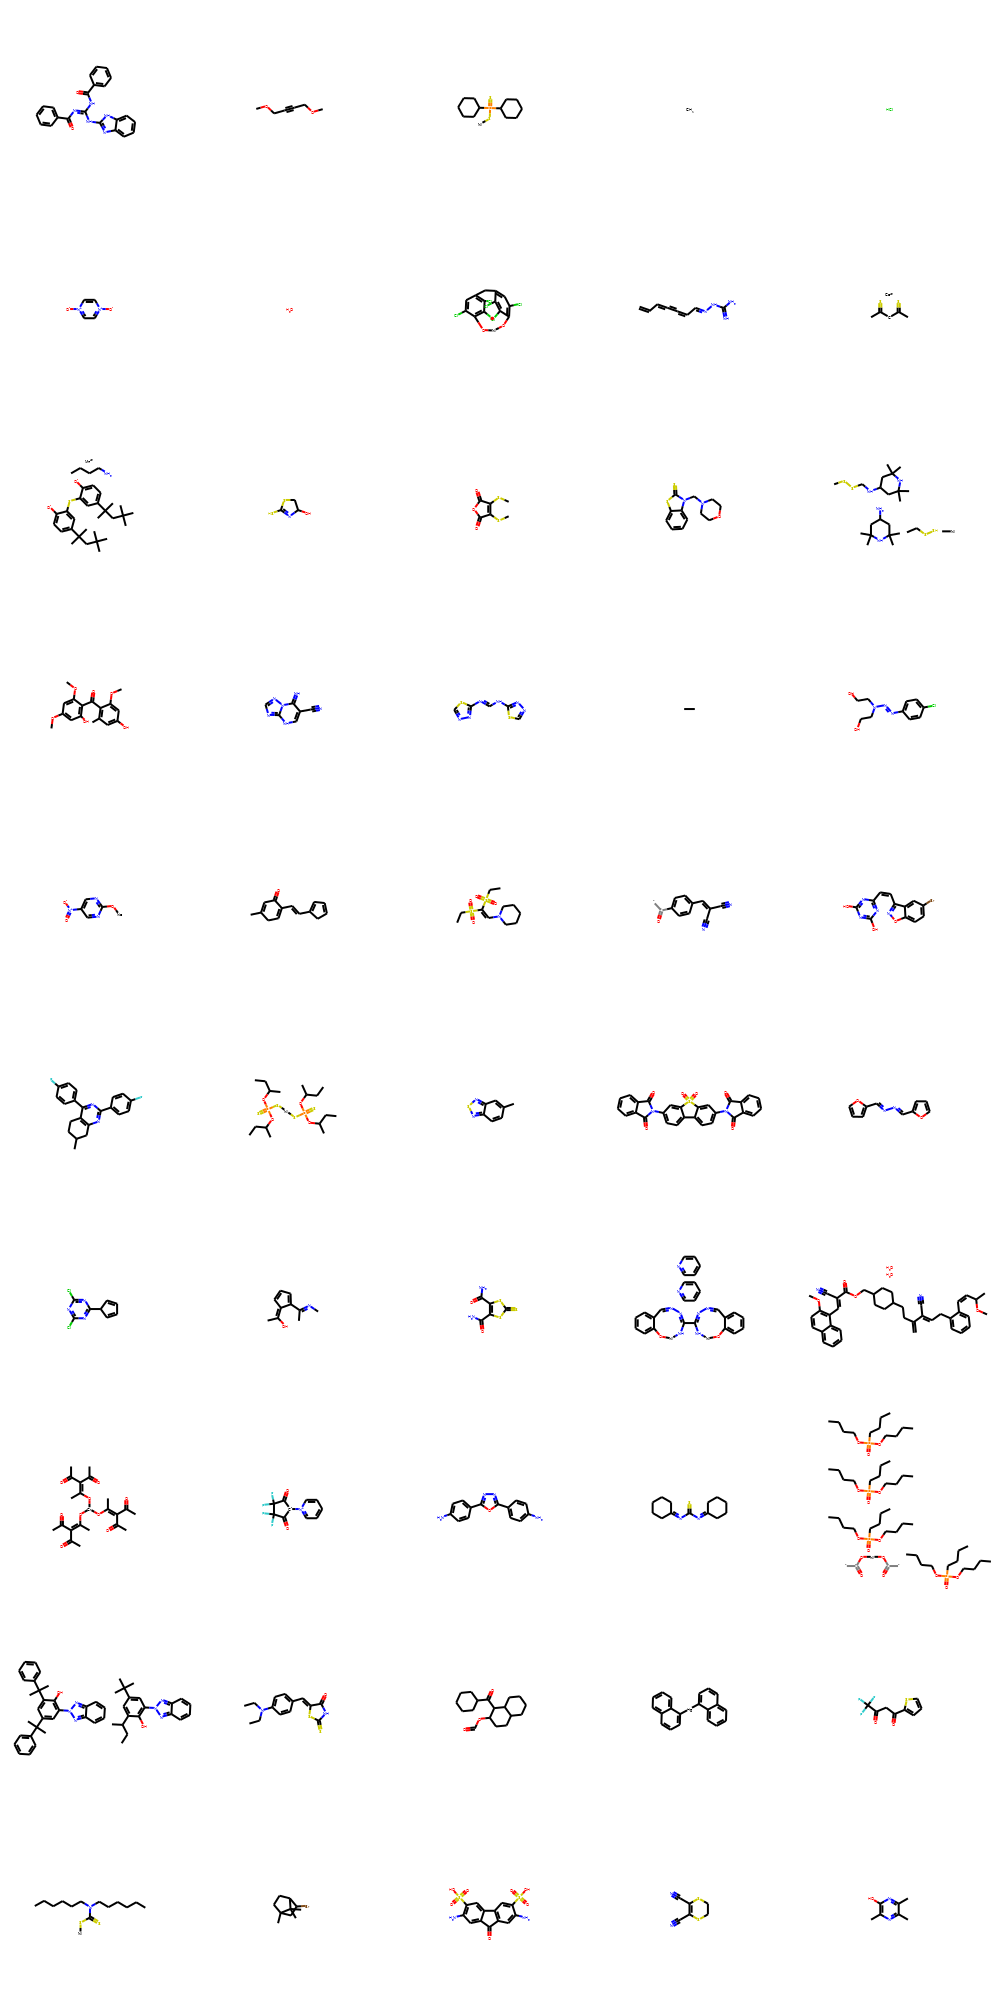

In [10]:
Draw.MolsToGridImage([ms[x] for x in dmat_ids[:50]], molsPerRow = 5)